In [155]:
import gensim
from matplotlib import pyplot as plt
import nltk
import pandas as pd
import pickle
import re
from sklearn.manifold import TSNE

In [17]:
data = pd.read_hdf('census-wordlist.hdf')

In [18]:
data

,sex,age,occupation,numPeople,reg,unmodified,synonym_list,unmodified_synonym_list,additional_synonyms,additional_unmodified_synonyms
0,female,o20,Egg-merchant and Dealer,37.0,"Egg merchant,Egg dealer","Merchant,Dealer","[Egg merchant, Egg dealer]","[Merchant, Dealer]",[],"[merchant, merchandiser, trader, bargainer, de..."
1,female,u19,Egg-merchant and Dealer,3.0,"Egg merchant,Egg dealer","Merchant,Dealer","[Egg merchant, Egg dealer]","[Merchant, Dealer]",[],"[merchant, merchandiser, trader, bargainer, de..."
2,male,o20,Egg-merchant and Dealer,136.0,"Egg merchant,Egg dealer","Merchant,Dealer","[Egg merchant, Egg dealer]","[Merchant, Dealer]",[],"[merchant, merchandiser, trader, bargainer, de..."
3,male,u19,Egg-merchant and Dealer,10.0,"Egg merchant,Egg dealer","Merchant,Dealer","[Egg merchant, Egg dealer]","[Merchant, Dealer]",[],"[merchant, merchandiser, trader, bargainer, de..."
4,female,o20,Embosser,14.0,Embosser,Embosser,[Embosser],[Embosser],[],[]
5,female,u19,Embosser,4.0,Embosser,Embosser,[Embosser],[Embosser],[],[]
6,male,o20,Embosser,54.0,Embosser,Embosser,[Embosser],[Embosser],[],[]
7,male,u19,Embosser,6.0,Embosser,Embosser,[Embosser],[Embosser],[],[]
8,female,o20,Embroiderer,593.0,Embroiderer,Embroiderer,[Embroiderer],[Embroiderer],[embroiderer],[embroiderer]
9,female,u19,Embroiderer,209.0,Embroiderer,Embroiderer,[Embroiderer],[Embroiderer],[embroiderer],[embroiderer]


In [292]:
#corpus = pd.read_hdf('corpus/pr-1840-1860-texts.hdf')
#alltext = []
#for i, row in corpus.iterrows():
#    text = row['text']
#    alltext.append(text)
#alltext = ''.join(alltext).lower()
f = open('bl-all.txt')
alltext = f.read()

In [122]:
name_dict = {}
r = re.compile(r'[^a-zA-Z_]+')
for i, row in data.iterrows():
    name = row['occupation']
    name_token = name.lower().replace(' ', '_')
    name_token = r.sub('', name_token)
    if name not in name_dict:
        name_dict[name] = (name_token, set())
    name_dict[name][1].update(row['synonym_list'])

In [168]:
name_dict['Carpenter and Joiner']

('carpenter_and_joiner', {'Carpenter', 'Joiner'})

In [293]:
# Replace all instances of the synonyms with the occupation name token (so that 'carpenter' becomes
# 'carpenter_and_joiner').  Only regular plurals are handled properly.
patterns = set()
sub_dict = {}
for name in name_dict:
    name_token, syns = name_dict[name]
    for syn in syns:
        syn = syn.lower()
        patterns.add(re.escape(syn).replace(r'\ ', '[ -]'))
        sub_dict[syn] = name_token
r = re.compile('([^a-z_])(' + '|'.join(patterns) + ')((e?s)?[^a-z_])')
alltext = r.sub(lambda m: m.group(1) + sub_dict[m.group(2).replace('-', ' ')] + m.group(3), alltext)

In [297]:
alltext = re.sub(r'\[verse\]', '', alltext)
alltext = re.sub(r'//.*$', '', alltext, flags=re.MULTILINE)
alltext = re.sub(r'\\', '', alltext)

In [298]:
sentences = nltk.sent_tokenize(alltext)
allsents = []
for sent in sentences:
    toks = nltk.word_tokenize(sent)
    toks = [tok.lower() for tok in toks if re.match(r'[a-zA-Z]', tok)]
    allsents.append(toks)

In [300]:
f = open('bl-all-processed.txt', 'w')
f.write('\n'.join([' '.join(toks) for toks in allsents]) + '\n')
f = open('bl-all-processed.pkl', 'wb')
pickle.dump(allsents, f)

OSError: [Errno 22] Invalid argument

In [341]:
model = gensim.models.Word2Vec(allsents, size=300, window=30, min_count=1, workers=4)

In [342]:
model.save("bl-all.model")

In [343]:
model.wv.most_similar('carpenter_and_joiner')

/anaconda3/lib/python3.6/site-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('blacksmith', 0.6790355443954468),
 ('shoemaker', 0.6242456436157227),
 ('journeyman', 0.6147120594978333),
 ('watchmaker', 0.5889689922332764),
 ('workman', 0.5886988043785095),
 ('weaver_branch_not_specified', 0.5728524923324585),
 ('wheelwright', 0.5501753091812134),
 ('brazier_brassfinisher_and_worker_and_tinker', 0.5473631024360657),
 ('apprentice', 0.5389117002487183),
 ('clothier', 0.5360974073410034)]

In [344]:
model.wv.most_similar('artist_fine_arts')

/anaconda3/lib/python3.6/site-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('painter_plumber_and_glazier', 0.7930248975753784),
 ('artist_fine_artss', 0.6671234369277954),
 ('artist', 0.666068434715271),
 ('painting', 0.6657856702804565),
 ('engraver_all_branches', 0.6537942886352539),
 ('artistic', 0.61325603723526),
 ('draughtsman', 0.6130889654159546),
 ('sculptor', 0.6104384660720825),
 ('easel', 0.5892333984375),
 ('rubens', 0.5813111066818237)]

In [345]:
model.wv.most_similar(['king', 'woman'], ['man'])

/anaconda3/lib/python3.6/site-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('queen', 0.6732341051101685),
 ('princess', 0.5672104954719543),
 ('kiug', 0.4895029664039612),
 ('berengaria', 0.4753648638725281),
 ('queen-mother', 0.4742687940597534),
 ('empress', 0.46125397086143494),
 ('elizabeth', 0.4601733386516571),
 ('philippa', 0.45244356989860535),
 ('prince', 0.4489987790584564),
 ('princesses', 0.4476022720336914)]

In [346]:
occupations_in_corpus = []
for name in name_dict:
    name_tok, _ = name_dict[name]
    try:
        model.wv[name_tok]
    except KeyError:
        continue
    occupations_in_corpus.append(name)
len(occupations_in_corpus)

385

In [360]:
occ_vecs = []
occ_names = []
for name in occupations_in_corpus:
    name_tok, _ = name_dict[name]
    sing_vec = model.wv[name_tok]
    #try:
    #    plur_vec = model.wv[name_tok + 's']
    #except KeyError:
    #    try:
    #        plur_vec = model.wv[name_tok + 'es']
    #    except KeyError:
    #        plur_vec = None
    #if plur_vec is not None:
    #    occ_vecs.append((sing_vec + plur_vec) / 2)
    #else:
    #    occ_vecs.append(sing_vec)
    occ_vecs.append(sing_vec)
    occ_names.append(name)
df = pd.DataFrame(occ_vecs, index=occ_names)

In [361]:
tsne_model = TSNE(n_components=2, random_state=0)
tsne = tsne_model.fit_transform(df)

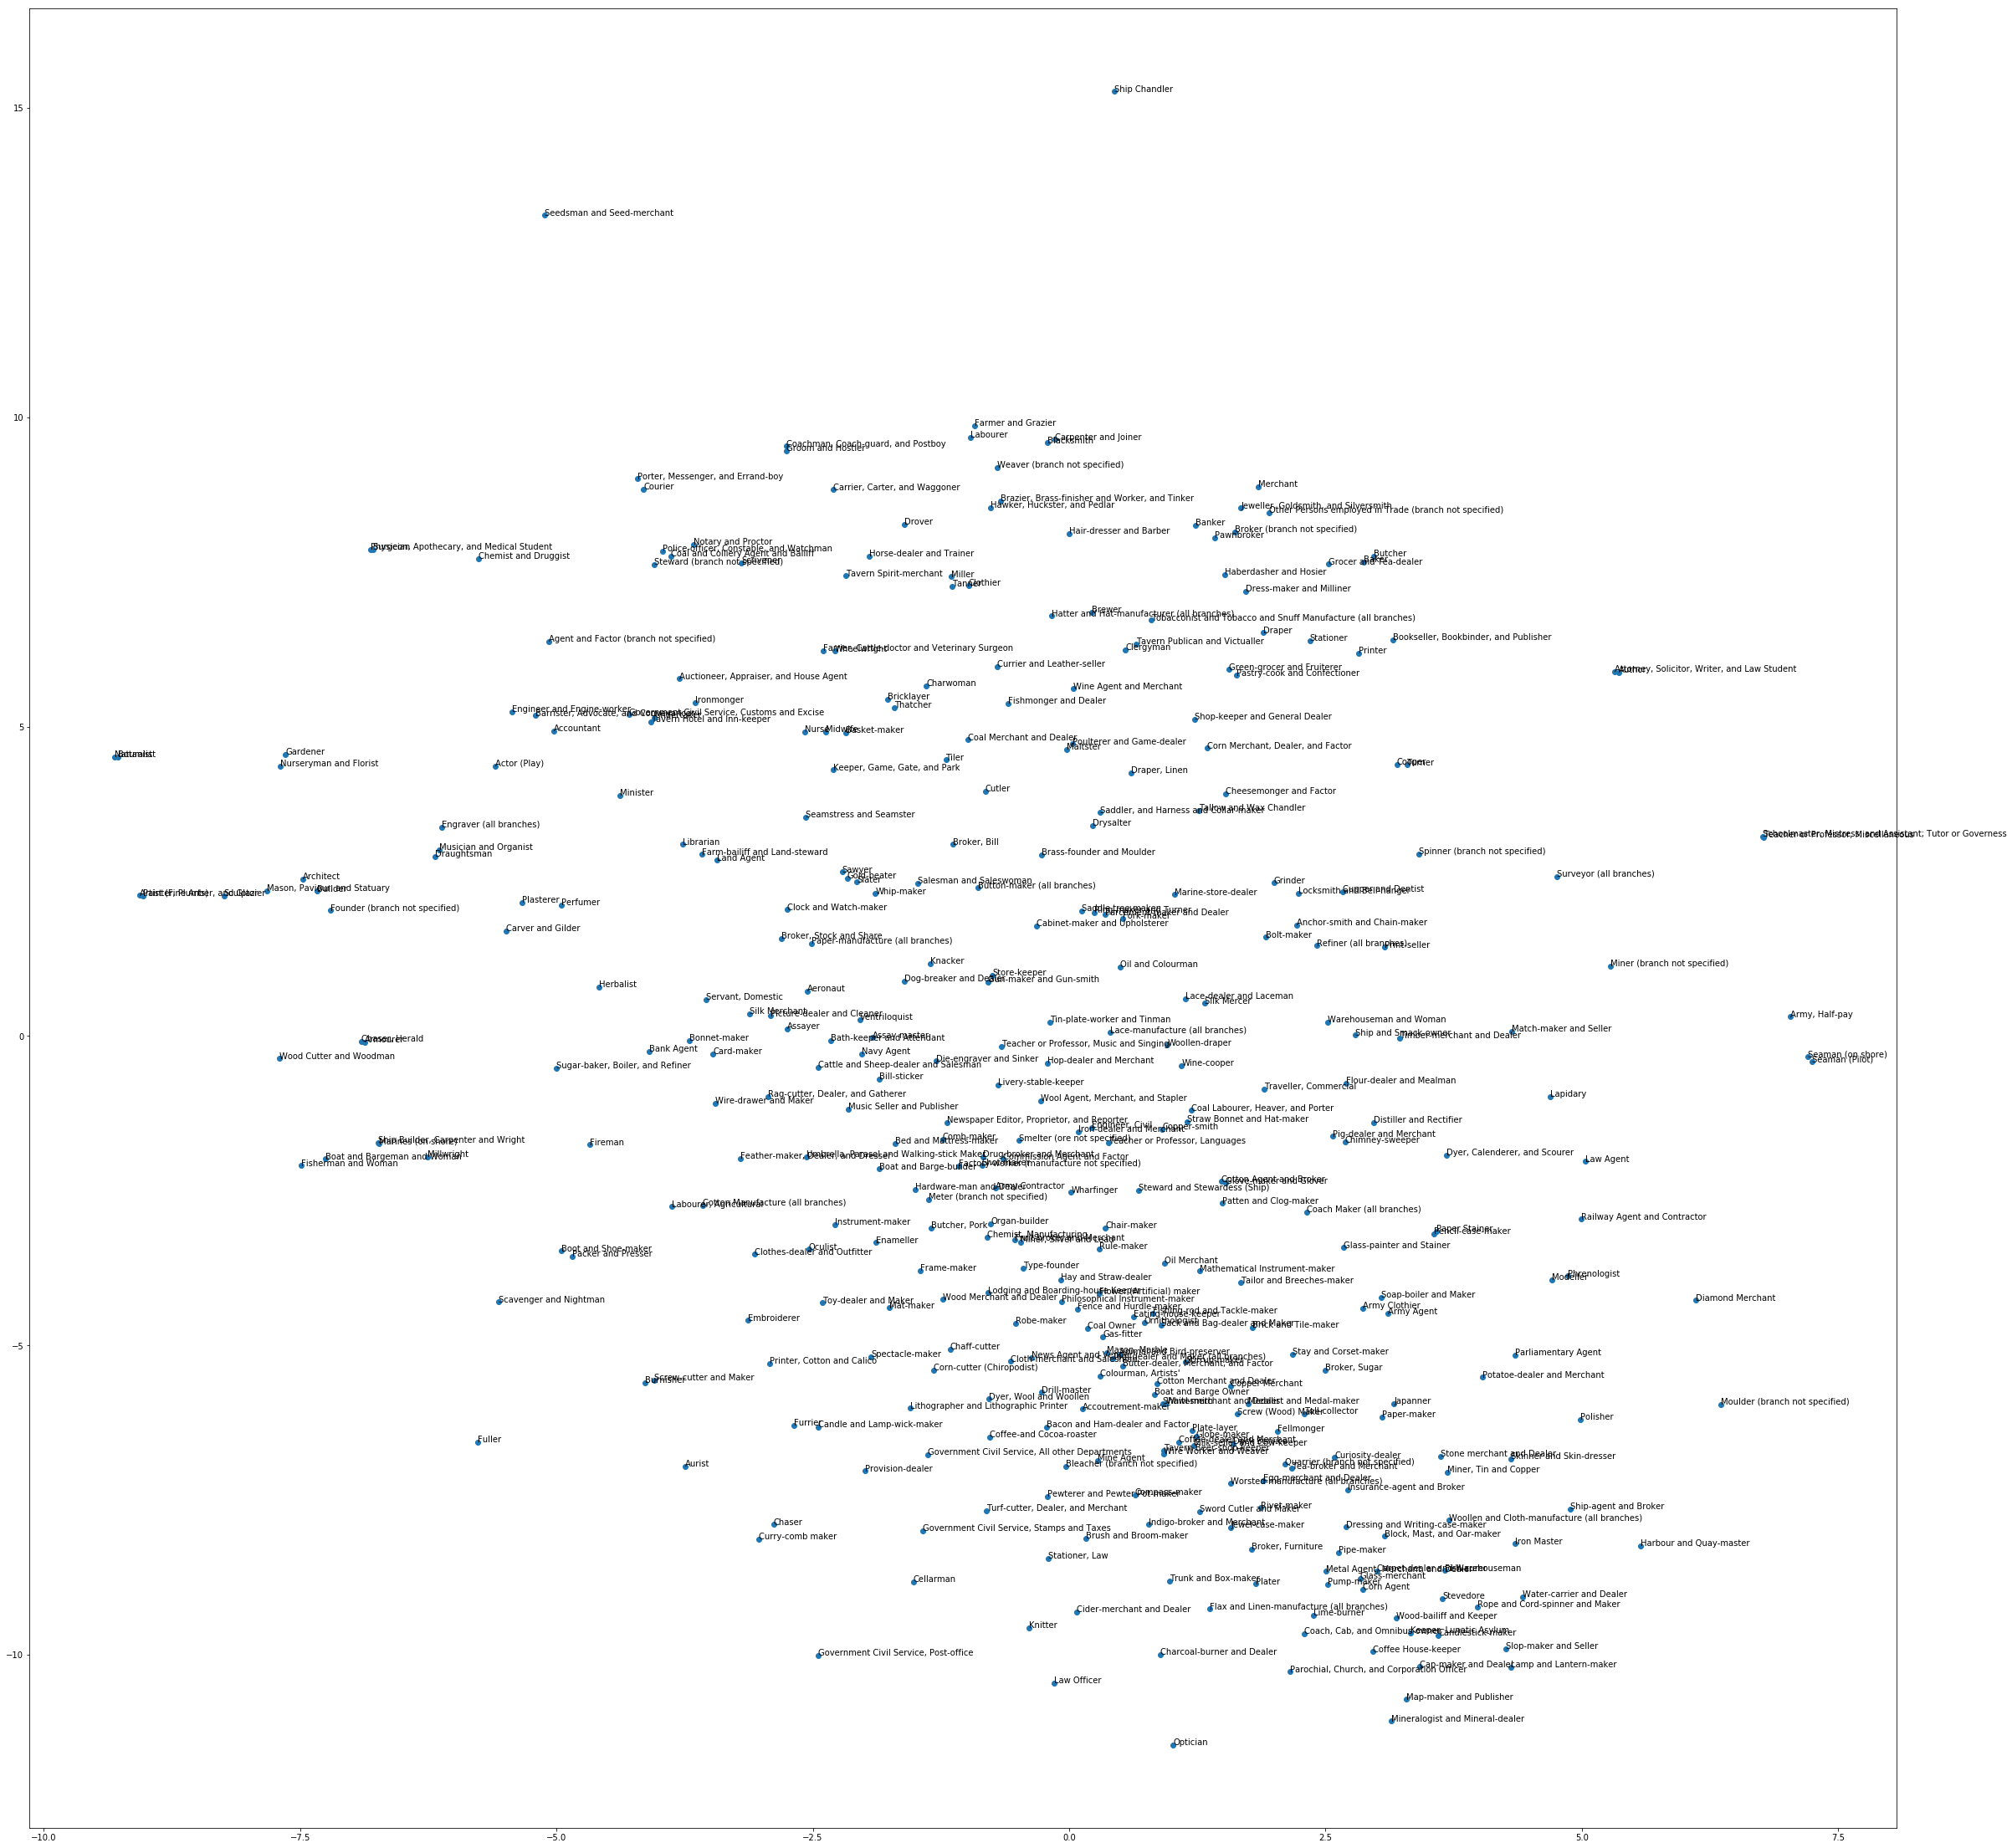

In [362]:
plt.rcParams["figure.figsize"] = (40,40)
plt.scatter(tsne[:,0], tsne[:,1])
for label, x, y in zip(occ_names, tsne[:, 0], tsne[:, 1]):
    plt.annotate(label, xy=(x, y), xytext=(0, 0), textcoords='offset points')